### Importing Libraries

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset from the local storage
from google.colab import files
uploaded = files.upload()

Saving salary.csv to salary.csv


### Summarization of dataset

In [3]:
df = pd.read_csv('salary.csv')
df.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [4]:
df.shape

(32561, 5)

In [5]:
df.describe()

,age,education.num,capital.gain,hours.per.week
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,40.437456
std,13.640433,2.572720,7385.292085,12.347429
min,17.000000,1.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,99.000000


In [6]:
df.dtypes

age                int64
education.num      int64
capital.gain       int64
hours.per.week     int64
income            object
dtype: object

In [7]:
df.columns

Index(['age', 'education.num', 'capital.gain', 'hours.per.week', 'income'], dtype='object')

### Checking for Null values

In [8]:
df.isnull().sum()

age               0
education.num     0
capital.gain      0
hours.per.week    0
income            0
dtype: int64

### Mapping the values of 'income' column

In [9]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [10]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [33]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['income']= label_encoder.fit_transform(df['income'])

df['income'].unique()

array([0, 1])

### Segregation of data into X and y

In [35]:
X = df.drop(columns='income', axis = 1)
print(X)

       age  education.num  capital.gain  hours.per.week
0       90              9             0              40
1       82              9             0              18
2       66             10             0              40
3       54              4             0              40
4       41             10             0              40
...    ...            ...           ...             ...
32556   22             10             0              40
32557   27             12             0              38
32558   40              9             0              40
32559   58              9             0              40
32560   22              9             0              20

[32561 rows x 4 columns]


In [36]:
Y = df.iloc[:,-1]
Y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64

### Train test split

In [37]:
#train_test_split using sklearn

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [38]:
X_train

,age,education.num,capital.gain,hours.per.week
15282,41,10,0,51
24870,25,13,0,25
18822,25,9,0,40
26404,53,9,0,40
7842,24,13,0,40
...,...,...,...,...
13123,90,10,0,40
19648,36,9,0,40
9845,26,8,0,51
10799,44,14,0,40


### Feature Scaling

In [39]:
#Feature scaling to standardize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Finding the beast K value

Text(0.5, 1.0, 'Error rate for k value')

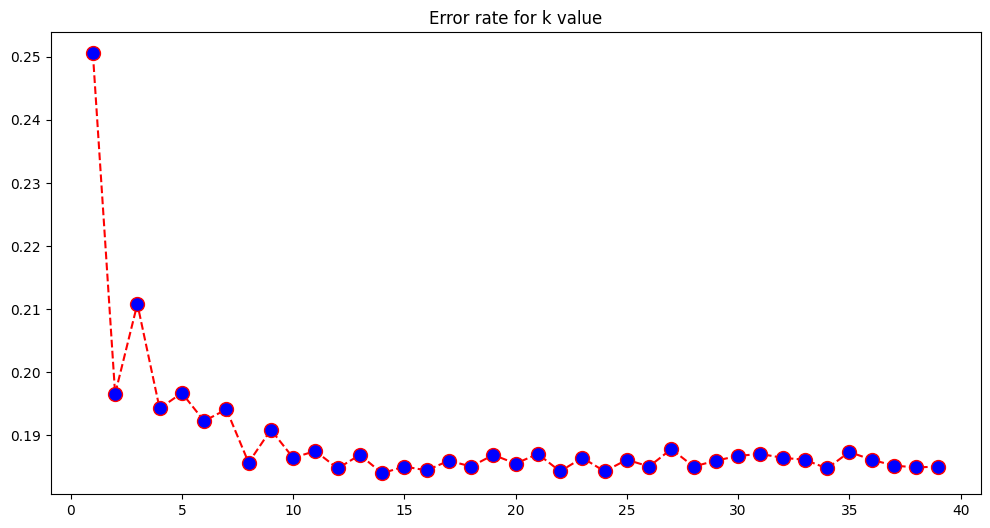

In [40]:
error = []
from sklearn.neighbors import KNeighborsClassifier

for i in range (1, 40):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)
  pred_i = model.predict(X_test)
  error.append(np.mean(pred_i != y_test))

plt.figure(figsize = (12, 6))
plt.plot(range(1, 40), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title("Error rate for k value")

In [41]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 23, metric = 'minkowski', p=2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

### Data validation - Prediction

In [42]:
age = int(input("Enter the employeer's age: "))
edu = int(input("Enter employee's education: "))
cg = int(input("Enter employee's capital gain: "))
wh = int(input("Enter employee's worl hour per week: "))

newEmp = [[age, edu, cg, wh]]
newEmp = sc.transform(newEmp)
result = model.predict(newEmp)
print(result)

if result == 1:
  print("above 50 K")
else:
  print("below 50 K")



Enter the employeer's age: 45
Enter employee's education: 12
Enter employee's capital gain: 0
Enter employee's worl hour per week: 67
[0]
below 50 K


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
